# Load the datasets from kaggle

In [ ]:
#Upload kaggle API json file
from google.colab import files
uploaded_json=files.upload()         

Saving kaggle.json to kaggle.json


In [ ]:
 #install kaggle API
!pip install -q kaggle       

In [ ]:
#move kaggle json file to /.kaggle on Google colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/         

In [ ]:
# List directory
!ls       

kaggle.json  sample_data


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Download dataset from Kaggale through API
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 98% 317M/325M [00:03<00:00, 102MB/s] 
100% 325M/325M [00:03<00:00, 109MB/s]


In [ ]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/benign/421.jpg  
  inflating: data/train/benign/422.jpg  
  inflating: data/train/benign/423.jpg  
  inflating: data/train/benign/424.jpg  
  inflating: data/train/benign/425.jpg  
  inflating: data/train/benign/426.jpg  
  inflating: data/train/benign/429.jpg  
  inflating: data/train/benign/43.jpg  
  inflating: data/train/benign/430.jpg  
  inflating: data/train/benign/431.jpg  
  inflating: data/train/benign/432.jpg  
  inflating: data/train/benign/434.jpg  
  inflating: data/train/benign/435.jpg  
  inflating: data/train/benign/438.jpg  
  inflating: data/train/benign/439.jpg  
  inflating: data/train/benign/440.jpg  
  inflating: data/train/benign/441.jpg  
  inflating: data/train/benign/442.jpg  
  inflating: data/train/benign/443.jpg  
  inflating: data/train/benign/445.jpg  
  inflating: data/train/benign/446.jpg  
  inflating: data/train/benign/447.jpg  
  inflating: data/train/benign/448.jpg  
  infla

In [ ]:
!ls

data	     sample_data			  test
kaggle.json  skin-cancer-malignant-vs-benign.zip  train


In [ ]:
# Import the required packages

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from PIL import Image
!pip install scikit-plot
import scikitplot as skplt
from sklearn.metrics import classification_report,confusion_matrix

#Import packages for Deep learning
import keras
from keras.layers import Conv2D,Dense,Dropout,Flatten,Input
from keras.layers import Activation,MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam,SGD
from keras.callbacks import ModelCheckpoint,Callback,EarlyStopping
from keras.utils import to_categorical,plot_model
from keras.models import Model
from keras import backend as K

#Ensures consistency across runs
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(42)
import os
import warnings
warnings.filterwarnings('ignore')
#Network visualization packages
import graphviz as gv
import pydot as pydot;

# Data preparation

In [ ]:
benign_train = '/content/data/train/benign'
malignant_train = '/content/data/train/malignant'

benign_test = '/content/data/test/benign'
malignant_test = '/content/data/test/malignant'

# lambda function to convert image into numpy array using RGB values
read = lambda image: np.asarray(Image.open(image).convert("RGB"))

# Load the training images & convert into array
benign_train_imgs = [read(os.path.join(benign_train, filename)) for filename in os.listdir(benign_train)]
X_benign_train = np.array(benign_train_imgs, dtype='uint8')
malignant_train_imgs = [read(os.path.join(malignant_train, filename)) for filename in os.listdir(malignant_train)]
X_malignant_train = np.array(malignant_train_imgs, dtype='uint8')

# Load the testing images & convert into array
benign_test_imgs = [read(os.path.join(benign_test, filename)) for filename in os.listdir(benign_test)]
X_benign_test = np.array(benign_test_imgs, dtype='uint8')
malignant_test_imgs = [read(os.path.join(malignant_test, filename)) for filename in os.listdir(malignant_test)]
X_malignant_test = np.array(malignant_test_imgs, dtype='uint8')

# Create labels
y_benign_train = np.zeros(X_benign_train.shape[0])
y_malignant_train = np.ones(X_malignant_train.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

# Merge train & test data

# Train data
X_train = np.concatenate((X_benign_train, X_malignant_train), axis = 0)
y_train = np.concatenate((y_benign_train, y_malignant_train), axis = 0)

# Test data
X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Shuffle data
X_train,y_train=shuffle(X_train,y_train,random_state=42)
X_test,y_test=shuffle(X_test,y_test,random_state=42)

In [ ]:
print(y_train.shape, y_test.shape)

(2637,) (660,)


In [ ]:
print(X_train.shape, X_test.shape)

(2637, 224, 224, 3) (660, 224, 224, 3)


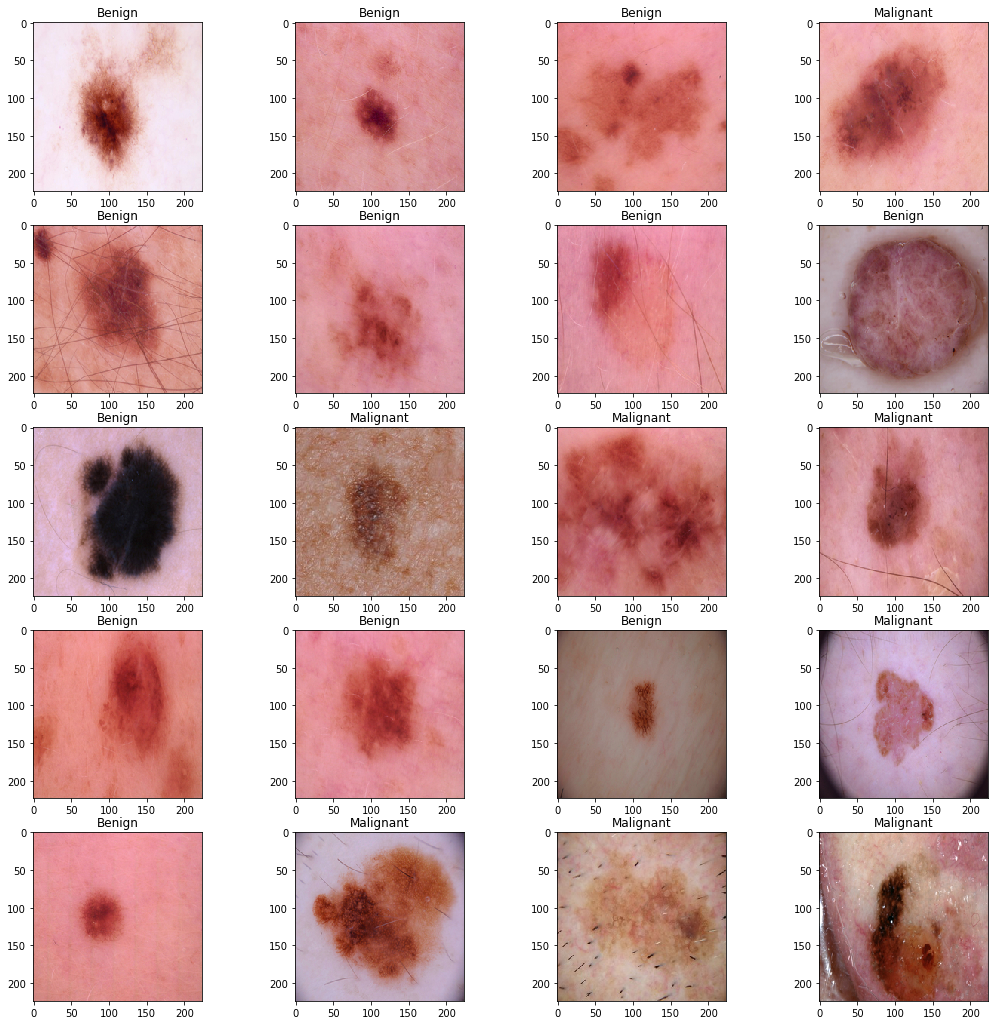

In [ ]:
# Display first 20 images of moles, and how they are classified

fig=plt.figure(figsize=(18, 18))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [ ]:
y_classes_train=np.unique(y_train)
y_classes_train

array([0., 1.])

In [ ]:
y_classes_test=np.unique(y_test)
y_classes_test

array([0., 1.])

## Reshape the datasets

In [ ]:
#Reshape the datasets
X_train=X_train.reshape(-1,224,224,3)             # Shape of image is 224 x 224 x 3 
X_test=X_test.reshape(-1,224,224,3)
print('Size after reshaping the datasets')
X_train.shape,X_test.shape

Size after reshaping the datasets


((2637, 224, 224, 3), (660, 224, 224, 3))

There are 2637 images in X_train & 660 images in X_test.

In [ ]:
#Change datatype from uint8 to float64 & scale input data to the range (0,1) (Normalization)
X_train=X_train.astype('float64')/255
X_test=X_test.astype('float64')/255

## Convert labels into categorical

In [ ]:
#convert target labels from integers to categorical
y_train=to_categorical(y_train,num_classes=2,dtype='uint8')
y_test=to_categorical(y_test,num_classes=2,dtype='uint8')
print('Shape of the target labels...')
print(y_train.shape,y_test.shape)

Shape of the target labels...
(2637, 2) (660, 2)


## Split the train data into train & validation sets

In [ ]:
#Split the train data
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
print('Shape of the train data..')
print(X_train.shape,y_train.shape)
print('Shape of the validation data..')
print(X_val.shape,y_val.shape)

Shape of the train data..
(2373, 224, 224, 3) (2373, 2)
Shape of the validation data..
(264, 224, 224, 3) (264, 2)


# Building Model with LeNet Architecture

It contains two series of Conv=>ReLU=>Pool layer sets followed by a fully connected layer & softmax output.

In [ ]:
#LeNet architecture
class LeNet:
     def build(width,height,depth,classes):
            #Initialize the model
            model=Sequential()
            input_shape=(height,width,depth)
            if K.image_data_format()=='channels_first':
                input_shape=(depth,height,width)
            #first set of Conv=>ReLU=> Pool layers
            model.add(Conv2D(20,(5,5),padding='same',input_shape=input_shape))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
            #Second set of Conv=>ReLU=> Pool layers
            model.add(Conv2D(50,(5,5),padding='same',input_shape=input_shape))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
            #FC=>ReLU layer with 500 nodes
            model.add(Flatten())
            model.add(Dense(500))
            model.add(Activation('relu'))
            #Add dense & softmax layer
            model.add(Dense(classes))
            model.add(Activation('softmax'))
            return model

In [ ]:
#Initialize the optimizer & model
opt=Adam(learning_rate=0.001)
model=LeNet.build(width=224,height=224,depth=3,classes=2)
plot_model(model,to_file='LeNet.png',show_shapes=True)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 20)      1520      
_________________________________________________________________
activation_8 (Activation)    (None, 224, 224, 20)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 20)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 50)      25050     
_________________________________________________________________
activation_9 (Activation)    (None, 112, 112, 50)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 156800)           

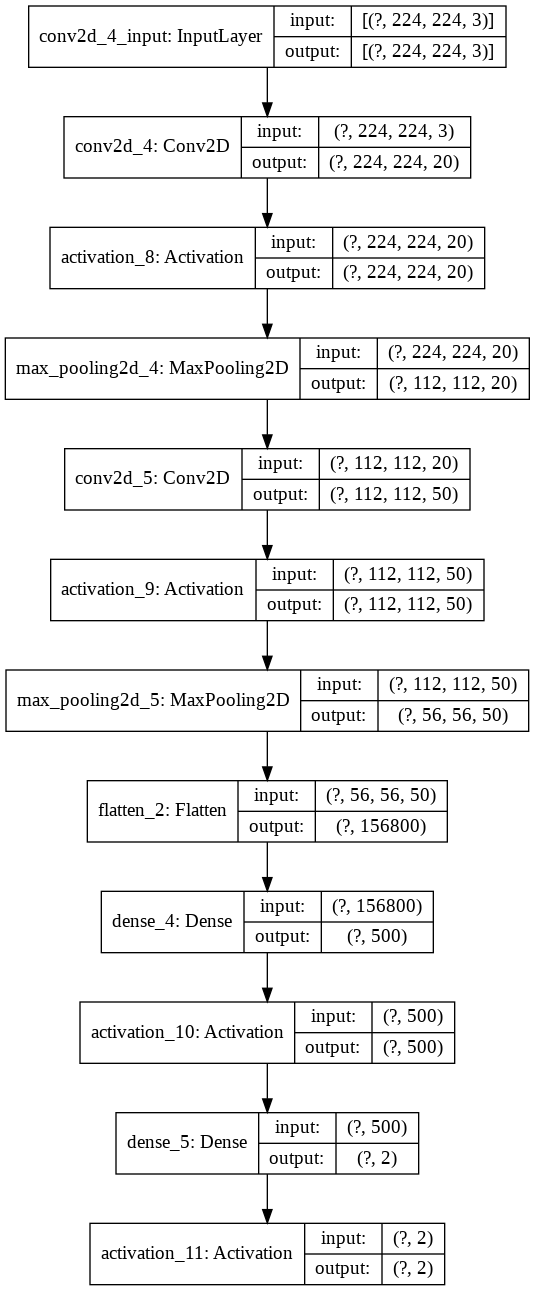

In [ ]:
#Visualize LeNet architecture using graphviz
from IPython.display import Image
Image('LeNet.png')

In [ ]:
#Prepare the model & save in the directory
save_dir=os.path.join(os.getcwd(),'saved_models')
model_name='Skin_cancer_model.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath=os.path.join(save_dir,model_name)

#Prepare callbacks for model saving & for learning rate adjustment
checkpoint=ModelCheckpoint(filepath=filepath,
                          monitor='val_acc',
                          verbose=1, mode='max',
                          save_best_only=True)
early_stopping=EarlyStopping(monitor='val_acc',mode='max',
                            verbose=1,patience=20)                      
callbacks=[checkpoint,early_stopping]

In [ ]:
#train the network
print('training the network....')
history=model.fit(X_train,y_train,batch_size=32,
                   validation_data=(X_val,y_val),epochs=10,
                   verbose=1,
                    callbacks=callbacks,
                    shuffle=True
                   )

training the network....
Epoch 1/10
75/75 [==============================] - ETA: 0s - loss: 1.5316 - acc: 0.6953
Epoch 00001: val_acc improved from -inf to 0.76894, saving model to /content/saved_models/Skin_cancer_model.h5
75/75 [==============================] - 290s 4s/step - loss: 1.5316 - acc: 0.6953 - val_loss: 0.4737 - val_acc: 0.7689
Epoch 2/10
75/75 [==============================] - ETA: 0s - loss: 0.4668 - acc: 0.7665
Epoch 00002: val_acc did not improve from 0.76894
75/75 [==============================] - 296s 4s/step - loss: 0.4668 - acc: 0.7665 - val_loss: 0.4758 - val_acc: 0.7273
Epoch 3/10
75/75 [==============================] - ETA: 0s - loss: 0.4360 - acc: 0.7737
Epoch 00003: val_acc improved from 0.76894 to 0.80682, saving model to /content/saved_models/Skin_cancer_model.h5
75/75 [==============================] - 302s 4s/step - loss: 0.4360 - acc: 0.7737 - val_loss: 0.4853 - val_acc: 0.8068
Epoch 4/10
75/75 [==============================] - ETA: 0s - loss: 0.448

In [ ]:
# save model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
#Evaluate the network
print('Evaluatng the network...')
y_pred=model.predict(X_test,batch_size=32)
target_names=['Benign','Malignant']
classification_report=classification_report(y_test.argmax(axis=1),y_pred.argmax(axis=1),
                                            target_names=target_names)
print('Classification Report...')
print(classification_report)

Evaluatng the network...


TypeError: ignored

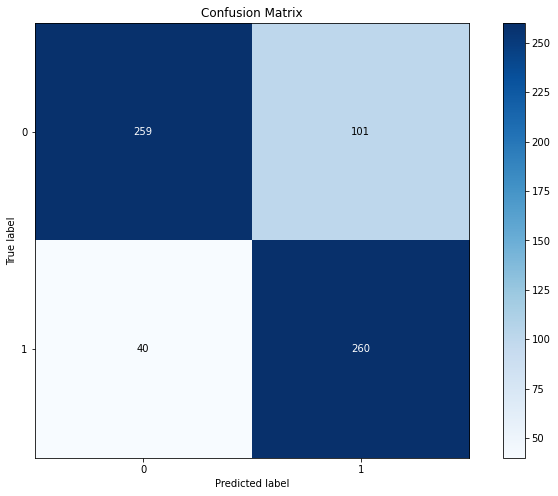

In [ ]:
#plot our confusion matrix
skplt.metrics.plot_confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1),normalize=False,figsize=(12,8))
plt.show()

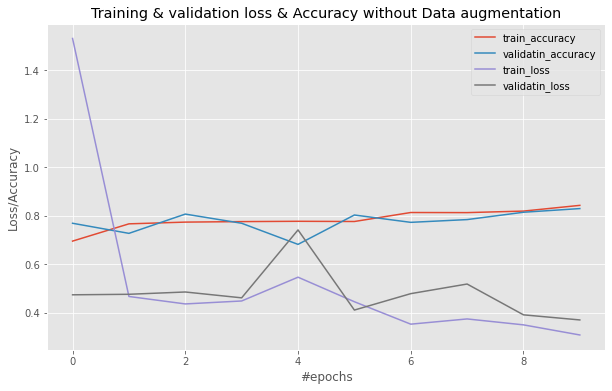

In [ ]:
#Plot the training loss & accuracy
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(np.arange(0,10),history.history['acc'],label='train_accuracy')
plt.plot(np.arange(0,10),history.history['val_acc'],label='validatin_accuracy')
plt.plot(np.arange(0,10),history.history['loss'],label='train_loss')
plt.plot(np.arange(0,10),history.history['val_loss'],label='validatin_loss')
plt.title('Training & validation loss & Accuracy without Data augmentation')
plt.xlabel('#epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()